In [ ]:
#!pip install lazypredict
import numpy as np
import keras
from keras import layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-06-14,37.000000,39.259998,37.000000,38.849998,27.591112,662600
2007-06-15,39.099998,39.099998,38.250000,38.799999,27.555611,1150000
2007-06-18,39.049999,39.099998,37.150002,37.150002,26.383793,853600
2007-06-19,37.150002,37.700001,36.099998,36.700001,26.064192,951000
2007-06-20,36.830002,36.830002,35.330002,35.950001,25.531542,1721800
...,...,...,...,...,...,...
2024-02-22,143.550003,144.029999,142.210007,143.630005,143.630005,1700500
2024-02-23,144.000000,144.330002,142.449997,143.110001,143.110001,1273500
2024-02-26,143.169998,143.690002,142.619995,142.789993,142.789993,1963800


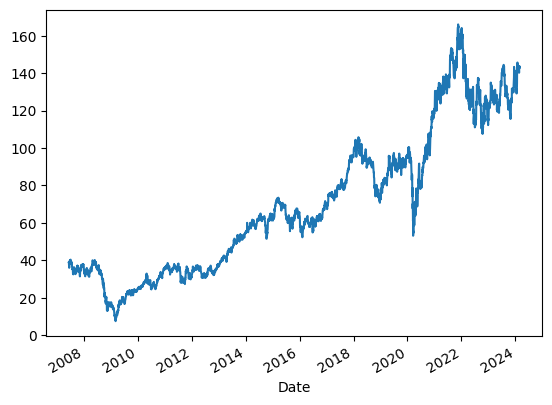

In [ ]:

import pandas as pd
from prophet import Prophet
import yfinance as yf

# Define the ticker symbols for the car manufacturing companies
#tickers = ['TM', 'VOW3.DE', 'GM', 'F', 'HMC', 'BMW.DE',  'TSLA', 'NSANY', 'HYMTF', 'INTC', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN', 'AVGO', 'AMAT', 'ADI', 'AMD']
tickers = ['TEL']
#VOLV-B.ST PE AIK MODEL 96 DE RAHA
#JNJ PE 77% ACCURACY
# Create an empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

# Download historical data for each company
for ticker in tickers:
    data = yf.download(ticker, start='2000-01-01', end='2024-02-29')
    closing_prices = data

# Drop any missing values
closing_prices.dropna(inplace=True)

# Display the closing prices DataFrame
display(closing_prices)

# jnj k lie ye sb se fir Model: GaussianNB
#Accuracy: 0.77
##              precision    recall  f1-score   support

#           0       0.77      1.00      0.87      1321
#           1       0.60      0.01      0.03       405

 #  accuracy                           0.77      1726
 #  macro avg       0.68      0.51      0.45      1726
#weighted avg       0.73      0.77      0.67      1726

closing_prices['Close'].plot()
df=closing_prices


In [ ]:
df['Price Change'] = df['Close'].diff()
import numpy as np
# Calculate gains and losses
df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Loss'] = np.where(df['Price Change'] < 0, -df['Price Change'], 0)

# Calculate average gains and average losses (using a 14-day period)
window = 14
df['Average Gain'] = df['Gain'].rolling(window=window).mean()
df['Average Loss'] = df['Loss'].rolling(window=window).mean()

# Calculate relative strength (RS)
df['RS'] = df['Average Gain'] / df['Average Loss']

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Calculate 12-day EMA
df['EMA12'] = df['Close'].ewm(span=12, min_periods=12).mean()

# Calculate 26-day EMA
df['EMA26'] = df['Close'].ewm(span=26, min_periods=26).mean()

# Calculate MACD line
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate signal line (9-day EMA of MACD)
df['Signal Line'] = df['MACD'].ewm(span=9, min_periods=9).mean()

# Calculate MACD histogram
df['MACD Histogram'] = df['MACD'] - df['Signal Line']

display(df[['Close', 'RSI', 'MACD', 'Signal Line', 'MACD Histogram']])
#closing_prices.to_csv('VOLVO.csv')
closing_prices= df.dropna()
closing_prices['tomorrows_closing'] = closing_prices['Close'].shift(-1)
closing_prices
#SETTING 1, BLKUL START MA ASTYPE KARDO
closing_prices['Direction'] = (closing_prices['tomorrows_closing'] > closing_prices['Close']).astype(int)
#AGAR WHOLE NUMBERS MAIN SAME HI RATE RAHA HAI TO 0 DAL DO, UP GYA HAI TO 1 AND US SE NECHE GYA HAI TO -1 DL DO , SOTHAT 3 DIFFERENT CLASSES BAN JAEN
df= closing_prices
df
df.corr()
#df=df.astype(int)
print('Our dataframe before applying')
display(df)
df.to_csv(str(tickers)+'.csv')

,Close,RSI,MACD,Signal Line,MACD Histogram
Date,,,,,
2007-06-14,38.849998,NaN,NaN,NaN,NaN
2007-06-15,38.799999,NaN,NaN,NaN,NaN
2007-06-18,37.150002,NaN,NaN,NaN,NaN
2007-06-19,36.700001,NaN,NaN,NaN,NaN
2007-06-20,35.950001,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-02-22,143.630005,53.841880,1.214500,1.529919,-0.315419
2024-02-23,143.110001,50.809584,1.212027,1.466341,-0.254313
2024-02-26,142.789993,56.172835,1.170750,1.407223,-0.236472


<ipython-input-3-095aa450205c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices['tomorrows_closing'] = closing_prices['Close'].shift(-1)
<ipython-input-3-095aa450205c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices['Direction'] = (closing_prices['tomorrows_closing'] > closing_prices['Close']).astype(int)


Our dataframe before applying


,Open,High,Low,Close,Adj Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram,tomorrows_closing,Direction
Date,,,,,,,,,,,,,,,,,,,,
2007-08-01,34.919998,36.000000,34.759998,35.220001,25.013103,3771700,-0.599998,0.000000,0.599998,0.112143,0.382857,0.292911,22.655160,37.230180,37.910314,-0.680134,-0.396113,-0.284020,35.270000,1
2007-08-02,34.610001,35.500000,34.090000,35.270000,25.048615,2519100,0.049999,0.049999,0.000000,0.082857,0.382857,0.216418,17.791407,36.927740,37.700548,-0.772808,-0.480515,-0.292293,35.090000,0
2007-08-03,35.099998,35.430000,35.000000,35.090000,24.920776,2445000,-0.180000,0.000000,0.180000,0.082857,0.383571,0.216015,17.764166,36.644318,37.494255,-0.849937,-0.561342,-0.288594,35.150002,1
2007-08-06,35.200001,35.320000,34.980000,35.150002,24.963396,3896600,0.060001,0.060001,0.000000,0.087143,0.352143,0.247465,19.837413,36.413947,37.309918,-0.895971,-0.633206,-0.262764,34.849998,0
2007-08-07,34.849998,35.380001,34.000000,34.849998,24.750328,2624200,-0.300003,0.000000,0.300003,0.087143,0.307857,0.283063,22.061495,36.172918,37.117363,-0.944445,-0.699075,-0.245370,34.740002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,143.550003,144.029999,142.210007,143.630005,143.630005,1700500,2.889999,2.889999,0.000000,0.690715,0.592143,1.166466,53.841880,142.013247,140.798747,1.214500,1.529919,-0.315419,143.110001,0
2024-02-23,144.000000,144.330002,142.449997,143.110001,143.110001,1273500,-0.520004,0.000000,0.520004,0.650000,0.629287,1.032916,50.809584,142.181978,140.969951,1.212027,1.466341,-0.254313,142.789993,0
2024-02-26,143.169998,143.690002,142.619995,142.789993,142.789993,1963800,-0.320007,0.000000,0.320007,0.650000,0.507143,1.281690,56.172835,142.275519,141.104769,1.170750,1.407223,-0.236472,143.630005,1


Direction
1    0.511622
0    0.488378
Name: proportion, dtype: float64


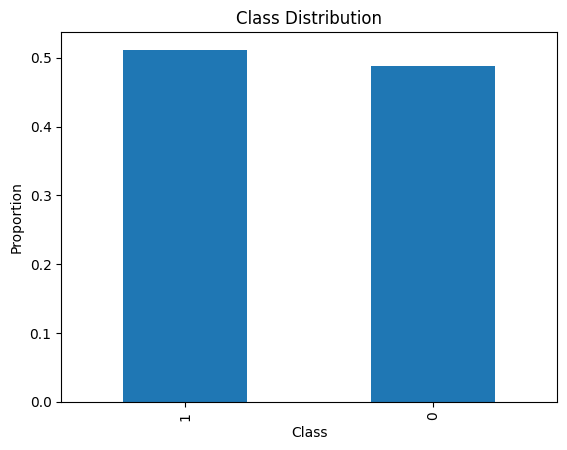

,Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram,tomorrows_closing
Date,,,,,,,,,,,,,,,
2007-08-01,35.220001,3771700,-0.599998,0.000000,0.599998,0.112143,0.382857,0.292911,22.655160,37.230180,37.910314,-0.680134,-0.396113,-0.284020,35.270000
2007-08-02,35.270000,2519100,0.049999,0.049999,0.000000,0.082857,0.382857,0.216418,17.791407,36.927740,37.700548,-0.772808,-0.480515,-0.292293,35.090000
2007-08-03,35.090000,2445000,-0.180000,0.000000,0.180000,0.082857,0.383571,0.216015,17.764166,36.644318,37.494255,-0.849937,-0.561342,-0.288594,35.150002
2007-08-06,35.150002,3896600,0.060001,0.060001,0.000000,0.087143,0.352143,0.247465,19.837413,36.413947,37.309918,-0.895971,-0.633206,-0.262764,34.849998
2007-08-07,34.849998,2624200,-0.300003,0.000000,0.300003,0.087143,0.307857,0.283063,22.061495,36.172918,37.117363,-0.944445,-0.699075,-0.245370,34.740002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,95.510002,643800,0.200005,0.200005,0.000000,0.383571,0.143571,2.671647,72.764264,94.763996,93.899287,0.864709,0.678102,0.186607,95.580002
2019-12-30,95.580002,1006500,0.070000,0.070000,0.000000,0.388571,0.101428,3.831008,79.300385,94.889535,94.023784,0.865751,0.715631,0.150119,95.839996
2019-12-31,95.839996,1599300,0.259995,0.259995,0.000000,0.407142,0.099285,4.100736,80.394986,95.035760,94.158319,0.877441,0.747993,0.129448,96.510002


,Direction
Date,
2007-08-01,1
2007-08-02,0
2007-08-03,1
2007-08-06,0
2007-08-07,0
...,...
2019-12-27,1
2019-12-30,1
2019-12-31,1


,Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram,tomorrows_closing
Date,,,,,,,,,,,,,,,
2020-01-06,94.709999,1150100,-0.660004,0.000000,0.660004,0.246428,0.195714,1.259124,55.735054,95.191542,94.431637,0.759905,0.793156,-0.033251,96.669998
2020-01-07,96.669998,2103400,1.959999,1.959999,0.000000,0.300000,0.195714,1.532847,60.518733,95.418997,94.597442,0.821555,0.798836,0.022719,97.669998
2020-01-08,97.669998,2001000,1.000000,1.000000,0.000000,0.354286,0.195714,1.810220,64.415598,95.765305,94.825038,0.940266,0.827122,0.113144,97.769997
2020-01-09,97.769997,1254000,0.099998,0.099998,0.000000,0.357142,0.195714,1.824816,64.599466,96.073719,95.043183,1.030535,0.867805,0.162731,98.070000
2020-01-10,98.070000,1528700,0.300003,0.300003,0.000000,0.378571,0.188571,2.007574,66.750616,96.380839,95.267392,1.113447,0.916933,0.196514,97.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21,140.740005,1789300,0.520004,0.520004,0.000000,0.488572,0.592143,0.825091,45.208212,141.719291,140.572246,1.147045,1.608774,-0.461729,143.630005
2024-02-22,143.630005,1700500,2.889999,2.889999,0.000000,0.690715,0.592143,1.166466,53.841880,142.013247,140.798747,1.214500,1.529919,-0.315419,143.110001
2024-02-23,143.110001,1273500,-0.520004,0.000000,0.520004,0.650000,0.629287,1.032916,50.809584,142.181978,140.969951,1.212027,1.466341,-0.254313,142.789993


,Direction
Date,
2020-01-06,1
2020-01-07,1
2020-01-08,1
2020-01-09,1
2020-01-10,0
...,...
2024-02-21,1
2024-02-22,0
2024-02-23,0


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Assuming y is a pandas Series
class_distribution = df['Direction'].value_counts(normalize=True)

print(class_distribution)


class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

train_percentage = 0.75

split_index = int(train_percentage * len(df))
df=df.dropna()
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]
X_train= train_data[['Close',	'Volume',	'Price Change',	'Gain',	'Loss'	,'Average Gain'	,'Average Loss',	'RS',	'RSI'	,'EMA12',	'EMA26'	,'MACD'	,'Signal Line',	'MACD Histogram',	'tomorrows_closing']	]
y_train= train_data[['Direction']]
#,'High',	'Low'	,'Close','Volume'
X_validate= test_data[['Close',	'Volume',	'Price Change',	'Gain',	'Loss'	,'Average Gain'	,'Average Loss',	'RS',	'RSI'	,'EMA12',	'EMA26'	,'MACD'	,'Signal Line',	'MACD Histogram',	'tomorrows_closing']	]
y_validate= test_data[['Direction']]
display(X_train)
display(y_train)
display(X_validate)
display(y_validate)

In [ ]:
df=df.dropna()
#df.isna().sum()
X_train.isna().sum()
#aik alag setting vo ye k tomoroorw ka col banany k baad as tpye int karo,aik test karo phle kar
#ke

Close                0
Volume               0
Price Change         0
Gain                 0
Loss                 0
Average Gain         0
Average Loss         0
RS                   0
RSI                  0
EMA12                0
EMA26                0
MACD                 0
Signal Line          0
MACD Histogram       0
tomorrows_closing    0
dtype: int64

In [ ]:
#sequential data ho to train split kese karte
# scale karny se koi faida hota bhi hai ya nnai

#X_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.20, random_state=42)


#X_train_array = X_train.values
#X_validate_array = x_validate.values

#_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
#X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5168161434977578
Model: NearestCentroid
Recall: 0.8568773234200744
Accuracy: 0.5129434324065196


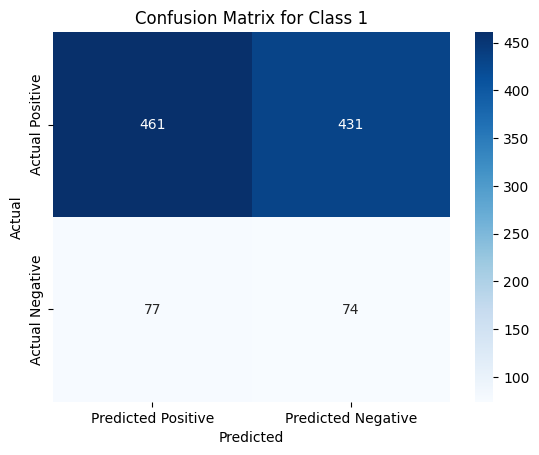

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5185185185185185
Model: BernoulliNB
Recall: 0.6765799256505576
Accuracy: 0.5091083413231065


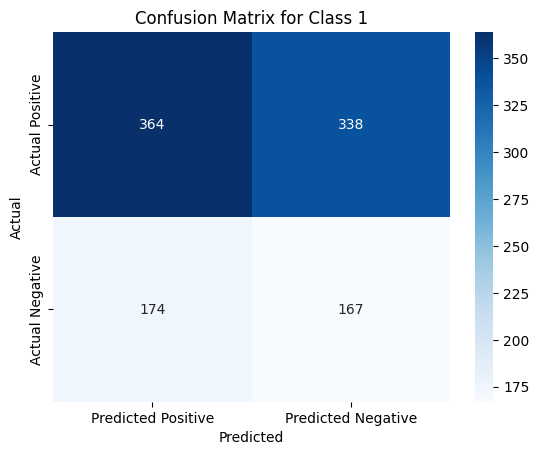

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.3333333333333333
Model: GaussianNB
Recall: 0.0018587360594795538
Accuracy: 0.48322147651006714


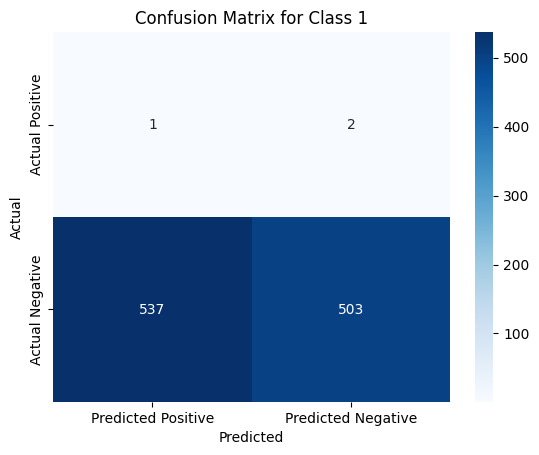

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5158197507190796
Model: SGDClassifier
Recall: 1.0
Accuracy: 0.5158197507190796


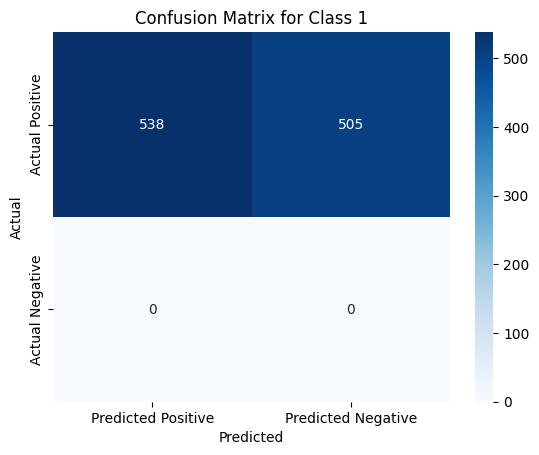

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1597, number of negative: 1532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 3129, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510387 -> initscore=0.041553
[LightGBM] [Info] Start training from score 0.041553
fd [0]
Precision 0.5752961082910322
Model: LGBMClassifier
Recall: 0.6319702602230484
Accuracy: 0.5695110258868649


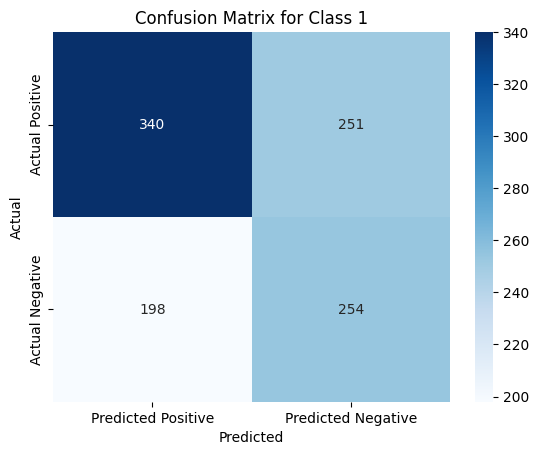

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5125881168177241
Model: QuadraticDiscriminantAnalysis
Recall: 0.9460966542750929
Accuracy: 0.5081495685522531


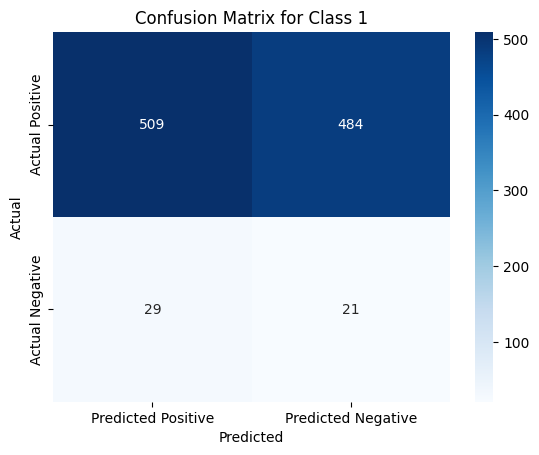

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreeClassifier was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5082304526748971
Model: ExtraTreeClassifier
Recall: 0.4591078066914498
Accuracy: 0.49185043144774687


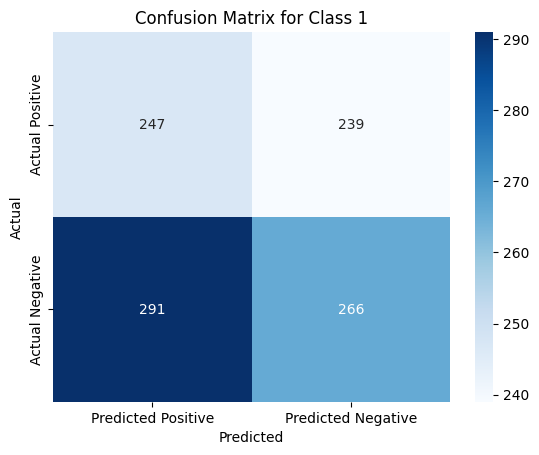

<ipython-input-7-9296b03b754c>:70: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.5411471321695761
Model: RandomForestClassifier
Recall: 0.4033457249070632
Accuracy: 0.5158197507190796


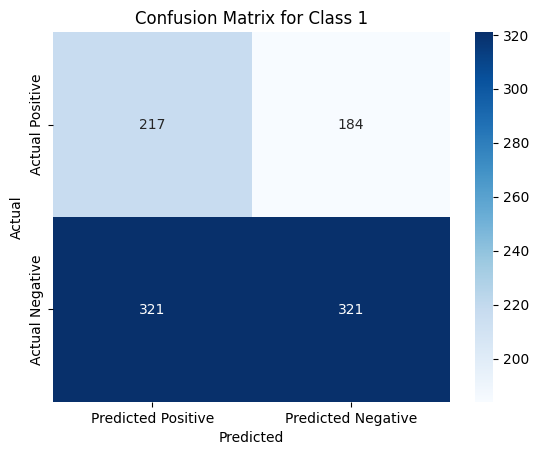

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.48148148148148145
Model: KNeighborsClassifier
Recall: 0.5074349442379182
Accuracy: 0.46404602109300097


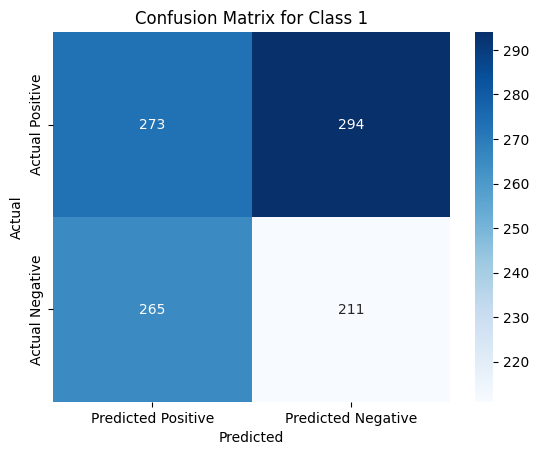

<ipython-input-7-9296b03b754c>:70: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.5437956204379562
Model: ExtraTreesClassifier
Recall: 0.5539033457249071
Accuracy: 0.5302013422818792


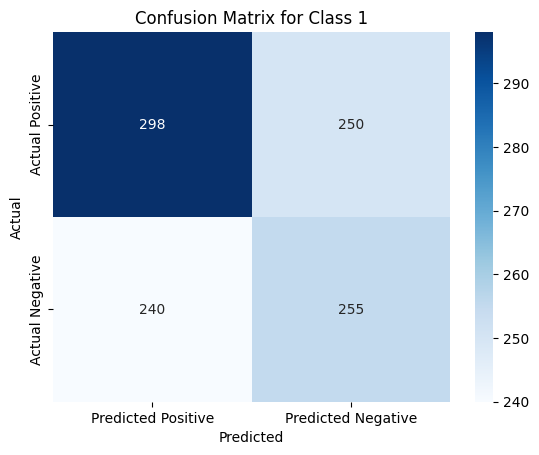

fd [0]
Precision 0.5848623853211009
Model: XGBClassifier
Recall: 0.4739776951672863
Accuracy: 0.5551294343240653


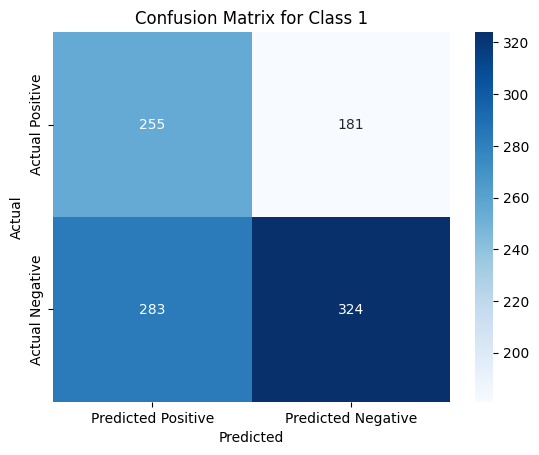

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.5305343511450382
Model: AdaBoostClassifier
Recall: 0.516728624535316
Accuracy: 0.5148609779482263


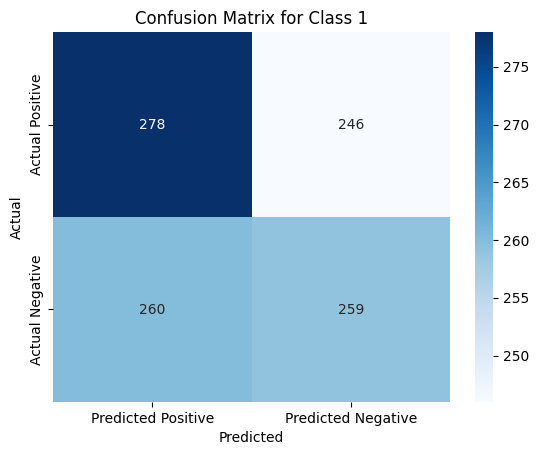

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5459610027855153
Model: DecisionTreeClassifier
Recall: 0.3643122676579926
Accuracy: 0.5158197507190796


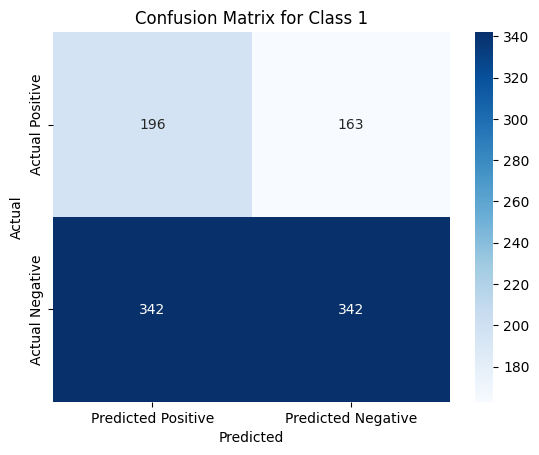

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


fd [0]
Precision 0.4987593052109181
Model: BaggingClassifier
Recall: 0.3736059479553903
Accuracy: 0.48322147651006714


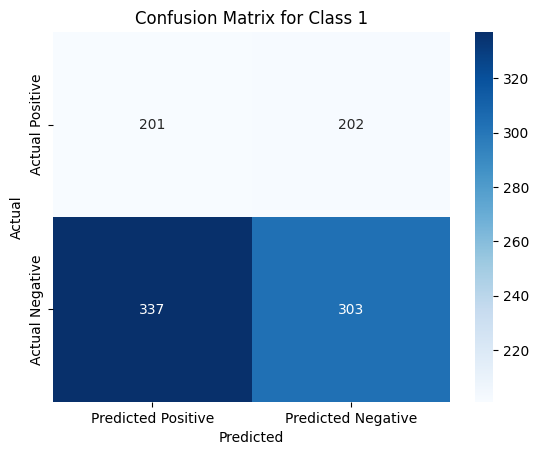

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.9467140319715808
Model: LinearDiscriminantAnalysis
Recall: 0.9907063197026023
Accuracy: 0.9664429530201343


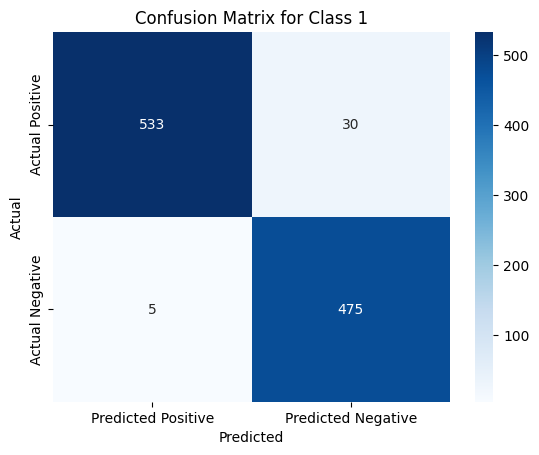

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeClassifierCV was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.9467140319715808
Model: RidgeClassifierCV
Recall: 0.9907063197026023
Accuracy: 0.9664429530201343


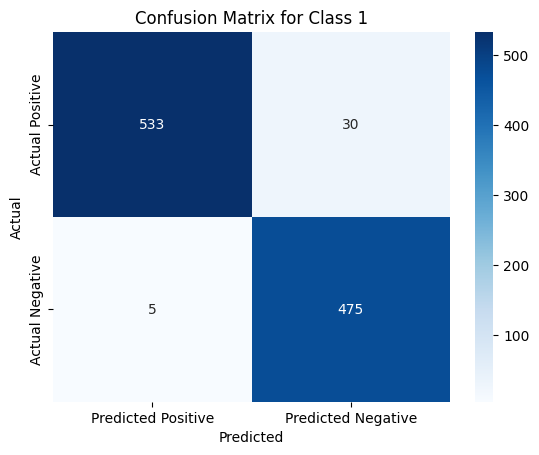

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/

fd [1]
Precision 0.516504854368932
Model: CalibratedClassifierCV
Recall: 0.9888475836431226
Accuracy: 0.5167785234899329


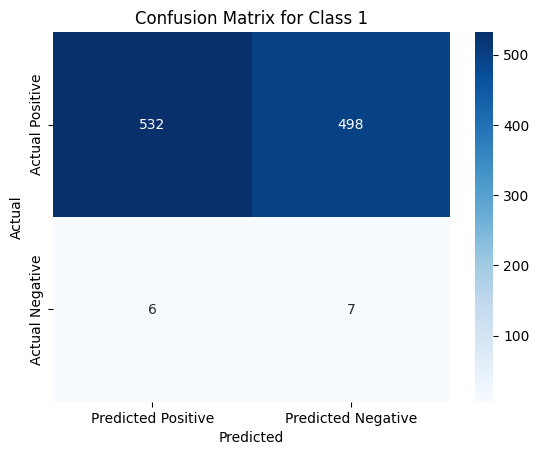

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5158197507190796
Model: LinearSVC
Recall: 1.0
Accuracy: 0.5158197507190796


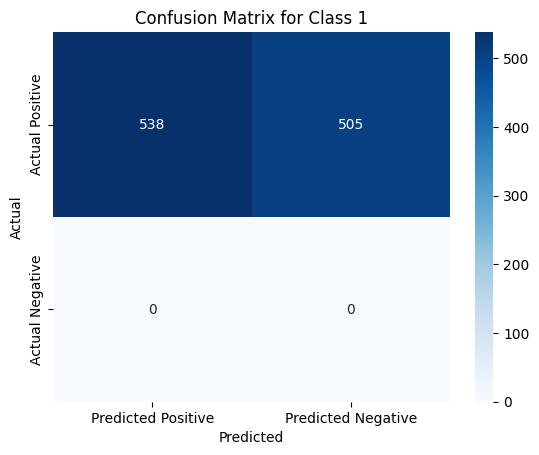

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5158197507190796
Model: LogisticRegression
Recall: 1.0
Accuracy: 0.5158197507190796


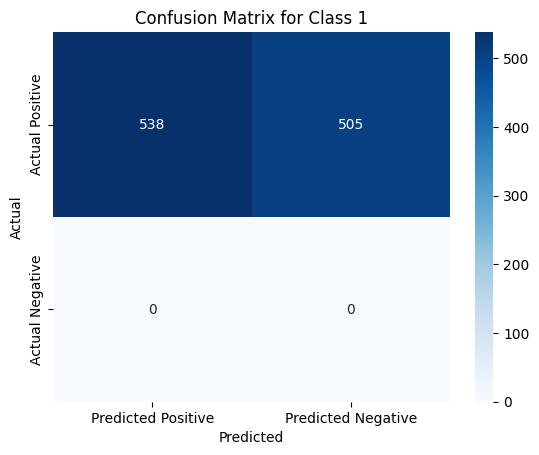

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PassiveAggressiveClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fd [0]
Precision 0.0
Model: PassiveAggressiveClassifier
Recall: 0.0
Accuracy: 0.4841802492809204


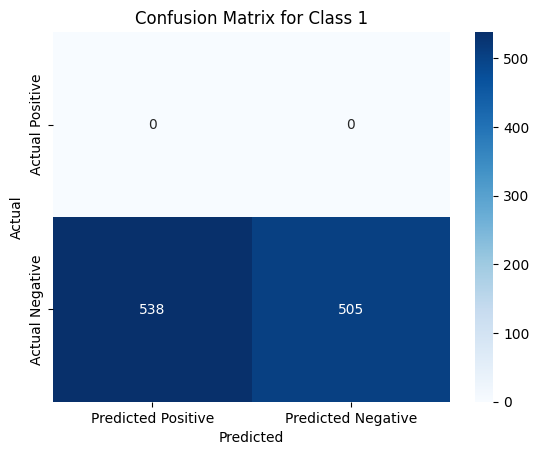

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to c

fd [0]
Precision 0.0
Model: LabelSpreading
Recall: 0.0
Accuracy: 0.4841802492809204


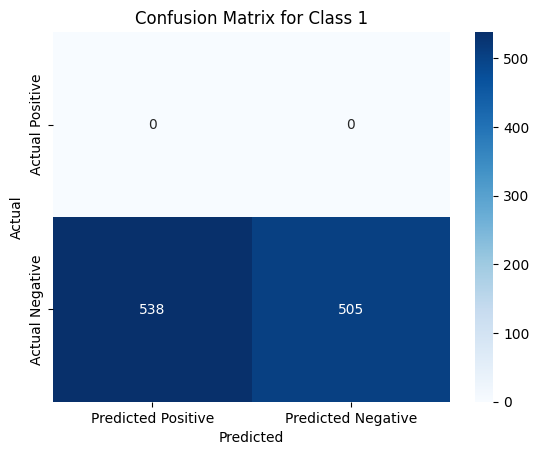

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

fd [0]
Precision 0.0
Model: LabelPropagation
Recall: 0.0
Accuracy: 0.4841802492809204


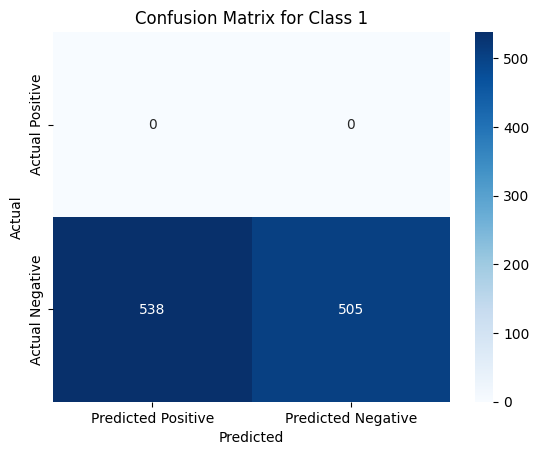

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fd [0]
Precision 0.0
Model: Perceptron
Recall: 0.0
Accuracy: 0.4841802492809204


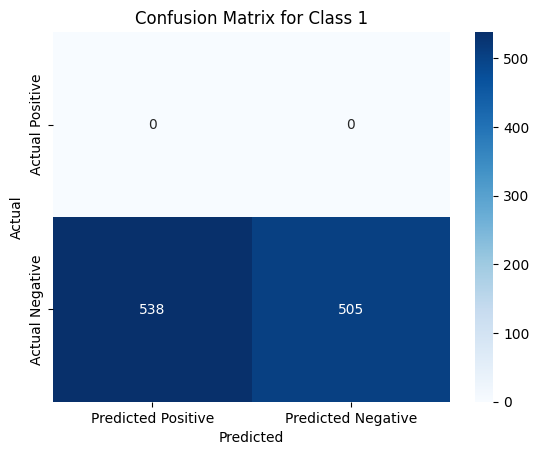

fd [1]
Precision 0.5158197507190796
Model: DummyClassifier
Recall: 1.0
Accuracy: 0.5158197507190796


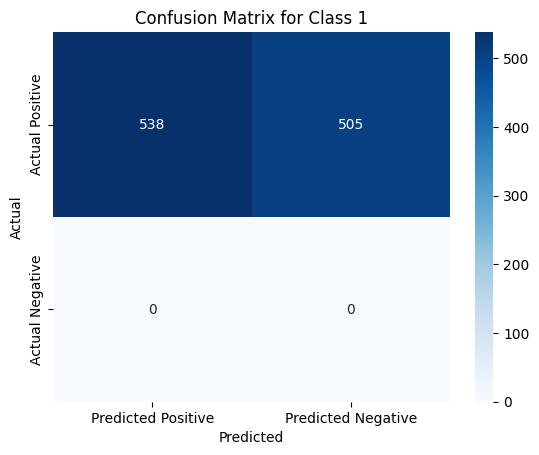

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.5159420289855072
Model: SVC
Recall: 0.9925650557620818
Accuracy: 0.5158197507190796


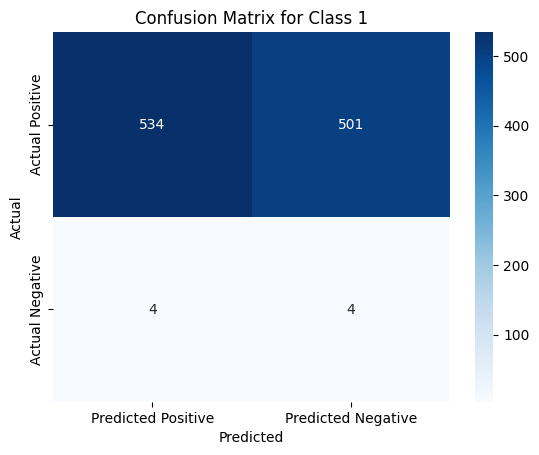

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.32228e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


fd [1]
Precision 0.9467140319715808
Model: RidgeClassifier
Recall: 0.9907063197026023
Accuracy: 0.9664429530201343


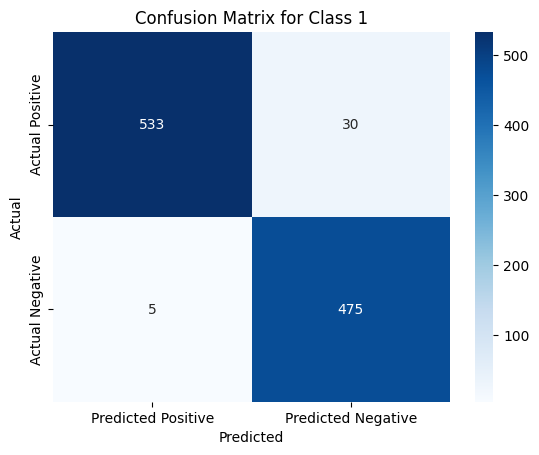

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score


from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

models = {
    "NearestCentroid": NearestCentroid(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "LinearSVC": LinearSVC(),
    "LogisticRegression": LogisticRegression(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "LabelSpreading": LabelSpreading(),
    "LabelPropagation": LabelPropagation(),
    "Perceptron": Perceptron(),
    "DummyClassifier": DummyClassifier(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "MultinomialNB": MultinomialNB(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegressionCV": LogisticRegressionCV(),
    "MLPClassifier": MLPClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('lgbm', LGBMClassifier())]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('lgbm', LGBMClassifier())],
        final_estimator=LogisticRegression()),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier()
}
X_new = [
    [142.69,1850300,-1.27000427246093,0, 1.27000427246093, 0.665000915527343,0.511428833007812, 1.30028045469463 , 56.5270400850859,142.812689433261 , 142.187095672377, 0.625593760883788, 0.398265172753832, 0.227328588129955, 145.679992675781]   # New example 1: Age 30, Income $55,000, Purchase history 1
]
# Iterate over models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_validate)
    newpred = model.predict(X_new)
    # Evaluate
    print('fd', newpred)

    accuracy = accuracy_score(y_validate, y_pred)
    precision = precision_score(y_validate, y_pred)
    print('Precision', precision)
    print(f"Model: {name}")

# Assuming y_true contains true labels and y_pred contains predicted labels
    recall = recall_score(y_validate, y_pred)
    accuracy = accuracy_score(y_validate, y_pred)
    cm = confusion_matrix(y_validate, y_pred)

    print("Recall:", recall)
    print("Accuracy:", accuracy)



    # Extract the relevant entries for the specific class
    tn, fp, fn, tp = cm.ravel()

    # Create the confusion matrix for class 1
    binary_confusion_matrix = [[tp, fp],
                              [fn, tn]]

    # Plotting the confusion matrix
    sns.heatmap(binary_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Class 1')
    plt.show()
#RIDGECLASSIFIER  VZ PE 1 KI BIH ZIADA PRECISION DE RAHA, NVDA PE BHI RIDGE 1 KI ACHI DE RAH

#LGBMClassifier 0.68 OF 1, XGBCLASIFER

In [ ]:
from lazypredict.Supervised import LazyClassifier
lazy=LazyClassifier()
#models,predict=lazy.fit(X_train_scaled, X_validate_scaled, y_train, y_validate )
#X_train, x_validate, y_train, y_validate
models,predict=lazy.fit(X_train, X_validate, y_train, y_validate )

print(models)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import precision_score, classification_report

class PrecisionCallback(Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        # Predict probabilities on validation set
        y_pred_prob = self.model.predict(self.X_val)

        # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
        y_pred_binary = (y_pred_prob > 0.5).astype(int)

        # Compute precision using sklearn
        precision = classification_report(self.y_val, y_pred_binary)

        # Print precision
        print(f'Precision: {precision}')

# Create an instance of PrecisionCallback
precision_callback = PrecisionCallback(X_validate, y_validate)



X_train_array = X_train.values
X_validate_array = X_validate.values

X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)


# Build the LSTM model
model_lstm_simple = keras.Sequential([
    layers.LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm_simple.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model_lstm_simple.fit(
    X_train_reshaped, y_train,
    validation_data=(X_validate_reshaped, y_validate),
    batch_size=64, epochs=100,
)
#history = model_lstm_simple.fit(
 #   X_train_reshaped, y_train,
 #   validation_data=(X_validate_reshaped, y_validate),
 #  batch_size=64, epochs=100,
 #   callbacks=[precision_callback]
#)
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score,  confusion_matrix

#

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.8),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.8),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model binary_crossentropy
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train , epochs=1000, batch_size=64, validation_data=(X_validate, y_validate ))
#AMZN PE 85%

In [ ]:
import tensorflow as tf

# Reshape the data for LSTM layers
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0], 1, X_train.shape[1])
X_validate_reshaped = X_validate_scaled.reshape(X_validate.shape[0], 1, X_validate.shape[1])

# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu', return_sequences=False)),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_reshaped, y_train, epochs=1000, batch_size=64, validation_data=(X_validate_reshaped, y_validate))

In [ ]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_validate_reshaped = X_validate_scaled.reshape(X_validate_scaled.shape[0], 1, X_validate_scaled.shape[1])

# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_reshaped, y_train, epochs=1000, batch_size=64, validation_data=(X_validate_reshaped, y_validate))

In [ ]:
input_data = np.array([[1, 2, 3, 4, 5],  # Example feature vector
                       [6, 7, 8, 9, 10]])  # Another example feature vector

# Standardize the features if needed (assuming X_train_scaled was standardized during training)
input_data_scaled = scaler.fit_transform(input_data)

# Make predictions
predictions = model_nn.predict(input_data_scaled)

# Assuming you're doing binary classification, you might want to threshold predictions
# For example, if predictions > 0.5, classify as 1, otherwise classify as 0
binary_predictions = (predictions > 0.5).astype(int)

print("Predictions:", binary_predictions)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Reshape the input data
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)

# Build the LSTM model
model_lstm_simple = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model binary_crossentropy
model_lstm_simple.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']
)

# Train the model
model_lstm_simple.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_validate_scaled, Y_validate_scaled),
    batch_size=64, epochs=200
)
